
# Decision Tree on Balanced Dataset



# Read In The Balanced Data
The data being read in has already been cleaned and balanced.
This was carried out in the file 'decisiontreeUNBALANCEDdata.ipynb'.

In [51]:
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


data = '/content/drive/My Drive/balancedCleanData.csv'
df = pd.read_csv(data, index_col=0)
#confirm our file was read in OK
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,RainTomorrow
0,0.232620,0.320988,0.000000,0.205479,0.189189,0.166667,0.438202,0.31,0.736342,0.714628,0.324468,0.335025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.612299,0.750617,0.000000,0.671233,0.486486,0.428571,0.247191,0.13,0.584323,0.541966,0.646277,0.781726,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.540107,0.459259,0.000000,0.493151,0.459459,0.476190,0.606742,0.46,0.484561,0.503597,0.457447,0.464467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.593583,0.434568,0.014286,0.493151,0.459459,0.619048,0.662921,0.60,0.296912,0.405276,0.555851,0.426396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.550802,0.427160,0.028571,0.849315,0.594595,0.666667,0.808989,0.61,0.187648,0.182254,0.476064,0.388325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Confirming our dataset is balanced

It is really important for decision trees to work on balanced data. If the dataset isnt balanced then the decision tree generated could be biased towards the majority class, which is this case was RainTomorrow=0.

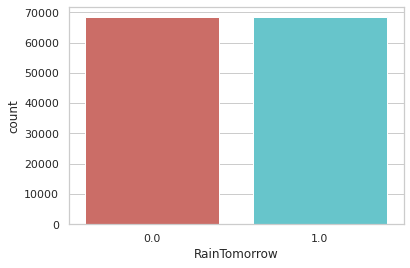

In [52]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x='RainTomorrow', data=df, palette='hls')
plt.show()

# Preprocessing

## Split feature matrix and target vector

Because this is a classification problem, we need to split up our features into the feature matrix and the target vector. Our target vector is the categorical variable RainTomorrow. It is a binary variable set to either 0 or 1. Standard procedure is to save the feature matrix as X and the target vector as y. The target vector is usually one dimensional, which we can see below. Our feature matrix currently has 61 features which is quite a lot.

In [53]:
X = df.loc[:,df.columns!='RainTomorrow']
y = df['RainTomorrow'] #this is what we want to predict
print(X.shape, y.shape)

(136692, 61) (136692,)


## Split Training and Test Data

Common practise in Machine learning is to split the data into training and test data. The training data is used to train the decision tree classifier. Then we can use the test data to validate the performance of the classifier. We use the class train_test_split which will split that data for us. We choose a to train wit 80% of the data and withold 20% for validation.

We confirm the dimensions are the same for both test and training below. Note that training has the same number of instances and tests have the same number of instances. This is what we expect.

In [54]:
from sklearn.model_selection import train_test_split

#spliting data for train and test
#train and test data for our feature matrix and target vector
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#note that X previously has 63 features and now only has 4.
#make sure training and test split properly
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(109353, 61) (27339, 61) (109353,) (27339,)


# Testing Performance of Decision Tree On All(61) Features, No Feature Selection Applied


Before applying feature selection to reduce the dimensionality. We wanted to build a model and train it on all 61 features to see how it performs. We could then use these results to compare with the model trained on the 3 k-best features. 

We used the classification accuracy and classification report to compare perforamance.



## Decision Tree on 61 Features - Implementation

In [0]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)


## Decision Tree on 61 Features - Classification Accuracy Score

The accuracy score of the classifier trained with 61 features is 0.83. This is not quite a high score.

In [56]:
from sklearn.metrics import accuracy_score
acc_decision_tree = accuracy_score(y_test , y_pred) 
print(acc_decision_tree)

0.8321811331797067


## Decision Tree on 61 Features - Classification report

We can see that this classifier has high recall and precision so overall a high f1-score.

In [57]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred )
print(report)

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83     13678
         1.0       0.83      0.84      0.83     13661

    accuracy                           0.83     27339
   macro avg       0.83      0.83      0.83     27339
weighted avg       0.83      0.83      0.83     27339



# Testing Performance of Decision Tree On Data with Feature Selection Applied(3)

Reminder: The data used here is balanced and unregularised.


## Decision Tree 3 Features - Feature Selection To Reduce Dimensionality


In order to reduce dimensionality we used the SelectKBest class form feature_selection. This class calculates the k-highest score. We choose to take the top 3 higher scoring features. 

We updated our feature matrix from 61 features to 3 features. The 3 features are 'Rainfall  Humidity3pm  RainToday'.


In [58]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=3)
selector.fit_transform(X, y) #Fit to data, then transform it.

#Change our training data set with the best features calculated by feature selection..
#update X which is our feature matrix
#Our feature matrix X now only has the best features.
X_feat = df[X.columns[selector.get_support(indices=True)]]
print(X_feat.head(3))


   Rainfall  Humidity3pm  RainToday
0       0.0         0.31        0.0
1       0.0         0.13        0.0
2       0.0         0.46        0.0


## Decision Tree 3 Features - Splitting Data Into Training and Test

We then split up our dataset into training and test data, similar to how we did earlier on. Again we choose a split of 80% training and 20% testing.

In [59]:
#spliting data for train and test
#train and test data for our feature matrix and target vector
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(X_feat, y, test_size=0.20, random_state=1)

#note that X previously has 63 features and now only has 4.
#make sure training and test split properly
print(x_train_f.shape, x_test_f.shape, y_train_f.shape, y_test_f.shape)

(109353, 3) (27339, 3) (109353,) (27339,)


## Decision Tree 3 Features - Decision Tree Implementation 


The model built here has been trained on the 3 features. As we saw, the accuracy score for decision tree without feature selection was 83%. Now after feature selection has been applied the accuracy scores jumpts to 88% which is an improvement.
We noted too that that the runtime was improved too.

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree
decision_tree_f = DecisionTreeClassifier()
decision_tree_f.fit(x_train_f, y_train_f)
y_pred_f = decision_tree_f.predict(x_test_f)
acc_decision_tree = accuracy_score(y_test_f,y_pred_f)
print("Accuracy score", acc_decision_tree) #, balanced data, feature selection done: 

Accuracy score 0.8813050952851238


The DecisionTreeClassifier() class allows us to set a tree depth limit, however we have not set one here. We have allowed the tree to grow without any limitations on depth. This is not usually advised because the model can fit too closely to the data. 
We will analyse this further on however for now let us look at the depth of the tree without any restricutions. We can see below that it is 49. So even though the accraucy is very high at 88%, a tree depth of 49 is very complex and it would be a diffciult task to try follow it. 
We will use this number for comparision later on.

In [61]:
#depth of the tree
print("Depth of the decision tree is :",  decision_tree_f.tree_.max_depth)

Depth of the decision tree is : 49


## Decision Tree 3 Features - Classification Report

We generated the classsification report below. We can see there is a big difference between this classifier and the previous classifier. Training on the 3 features has improved precision, recall, f1-score and accuracy.

In [62]:
from sklearn.metrics import classification_report
report_f = classification_report(y_test_f, y_pred_f )
print(report_f)

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89     13678
         1.0       0.95      0.81      0.87     13661

    accuracy                           0.88     27339
   macro avg       0.89      0.88      0.88     27339
weighted avg       0.89      0.88      0.88     27339



## Decision Tree 3 Features - ROC Curve and Area Under The Curve(AUC)

Then we plotted an ROC curve. The AUC can indicate which model has better classification performance and we will use this to compare the models. Area under the ROC curve is 88 which is higher than the logistic regression and SVM AUC

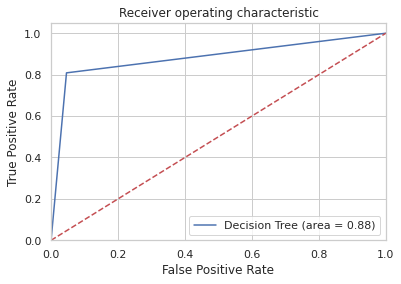

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

dt_roc_auc = roc_auc_score(y_test_f, y_pred_f)
fpr, tpr, thresholds = roc_curve(y_test_f, y_pred_f)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Confusion Matrix Decision Tree

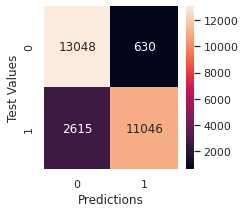

In [64]:
import matplotlib.pyplot as plt
import matplotlib.style as sty
import seaborn as sns
from sklearn.metrics import confusion_matrix

confMatDT = confusion_matrix(y_test_f,y_pred_f)


f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(confMatDT,annot=True,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()

# Rugularize the Decision Tree Model
To further improve the performance of our model we regulaised it. This was carried out on the balanced data with 3 features. This involves setting a tree depth limit. As mentioned above, when the tree was allowed generate without any restrictions, it made a tree of depth 47 which is very complex. There is the risk of overfitting in this case.

We tested a number of tree depths. We demonstrate tree depth 5 as a comparison for depth 15. As you can see, regularising the mode with a depth of 5 decreases the accuracy by 10%. If the limit is to restrictive there is the possibility of underfitting.

We decided that a depth of 15 was optimal with an accuracy of 83%. Our accuracy score has decreased by 5% however this cost is worth is to avoid overfitting.

## Regularise The Model - Comparison Of Tree Depths

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Decision Tree
decision_tree_f_r_5 = DecisionTreeClassifier(max_depth=5)
decision_tree_f_r_5.fit(x_train_f, y_train_f )
y_pred_f_r_5 = decision_tree_f_r_5.predict(x_test_f)
acc_decision_tree_r = accuracy_score(y_test_f,y_pred_f_r_5)
print("Accuracy score: ", acc_decision_tree_r) #balanced data, feature selection done:
print("Depth of the decision tree is :",  decision_tree_f_r_5.tree_.max_depth)

Accuracy score:  0.7724861918870478
Depth of the decision tree is : 5


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Decision Tree
decision_tree_f_r = DecisionTreeClassifier(max_depth=15)
decision_tree_f_r.fit(x_train_f, y_train_f )
y_pred_f_r = decision_tree_f_r.predict(x_test_f)
acc_decision_tree_r = accuracy_score(y_test_f,y_pred_f_r)
print("Accuracy score: ", acc_decision_tree_r) #, balanced data, feature selection done
print("Depth of the decision tree is :",  decision_tree_f_r.tree_.max_depth)

Accuracy score:  0.8357291780972238
Depth of the decision tree is : 15


## Regularise The Model -  Classification report
This classification report details the stats on the regularised model. Again this is here for comparison with the unregularised model above

In [67]:

from sklearn.metrics import classification_report
report_f_r = classification_report(y_test_f, y_pred_f_r )
print(report_f_r)

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84     13678
         1.0       0.85      0.81      0.83     13661

    accuracy                           0.84     27339
   macro avg       0.84      0.84      0.84     27339
weighted avg       0.84      0.84      0.84     27339



## Regularise The Model -  Confusion matrix
Details of the confusion matrix for the regularised data.

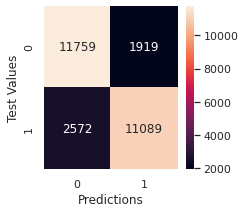

In [68]:
import matplotlib.pyplot as plt
import matplotlib.style as sty
import seaborn as sns
from sklearn.metrics import confusion_matrix

confMatDT_r = confusion_matrix(y_test_f,y_pred_f_r)
f_r, ax_r = plt.subplots(figsize = (3,3))
sns.heatmap(confMatDT_r,annot=True,linecolor="red",fmt=".0f",ax=ax_r)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()

## Regularise The Model -  ROC curve
This is the ROC curve for the regularised model. It can be compared to the ROC of the non-regularised. After the data has been pruned the mode performs better in terms of AUC(Area Under the Curve). As you can see this model did not perform as well as the unregularised model, however a tree depth of 15 is not too complex so we were happy with this accuracy score.

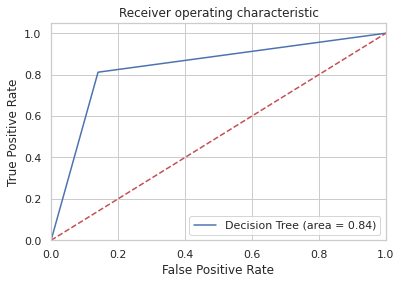

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

dt_roc_auc_r = roc_auc_score(y_test_f,y_pred_f_r)
fpr_r, tpr_r, thresholds_r = roc_curve(y_test_f, y_pred_f_r)
plt.figure()
plt.plot(fpr_r, tpr_r, label='Decision Tree (area = %0.2f)' % dt_roc_auc_r)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Other Models
We also implemented random forest and an emsemble voting classifier, however, these were not included in the final write up.

## Random Forest with balanced data

### RF model

In [76]:
from sklearn.ensemble import RandomForestClassifier


# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train_f, y_train_f)
y_pred_rf = random_forest.predict(x_test_f)
acc_random_forest = accuracy_score(y_test_f,y_pred_rf) *100
print(acc_random_forest)


88.3828962288306
88.33534511137935


### Classification report for RF model

In [71]:
from sklearn.metrics import classification_report
report_f = classification_report(y_test_f, y_pred_rf )
print(report)

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83     13678
         1.0       0.83      0.84      0.83     13661

    accuracy                           0.83     27339
   macro avg       0.83      0.83      0.83     27339
weighted avg       0.83      0.83      0.83     27339



### Confusion Matrix

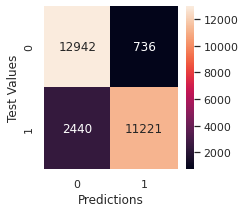

In [72]:
import matplotlib.pyplot as plt
import matplotlib.style as sty
import seaborn as sns
from sklearn.metrics import confusion_matrix

confMatDT = confusion_matrix(y_test_f,y_pred_rf)


f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(confMatDT,annot=True,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()

## Random Forest ROC Curve

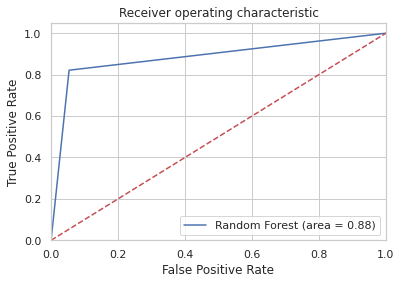

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

dt_roc_auc = roc_auc_score(y_test_f, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test_f, y_pred_rf)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Voting Classifier ensemble method


We had considered implementing an ensemble method as they usually outperform individual methods. If we had time to add this to the report we could have mentioned that using the ensemble method we learnt that a random forest classifier would have performed best in terms of rainfall prediction. It does not come at a surpise so that the decision tree classifier performed second best, because random forest is a combination of decision trees.

In [74]:
#code from hands on book p.192
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier( estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(x_train_f, y_train_f)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

lets look at each classifiers accuracy on the test set
We already knew that Random Forest classifier had an accuracy score of 88%. Using the emseble method we can see that this classifier would be the best choice for predicting rainfall.

In [75]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(x_train_f, y_train_f)
  y_pred_clf = clf.predict(x_test_f)
  print(clf.__class__.__name__, accuracy_score(y_test_f, y_pred_clf))

LogisticRegression 0.7433702768938147
RandomForestClassifier 0.8834266066791031
SVC 0.7488935220746918
VotingClassifier 0.7719741029298804
LogisticRegression 0.7433702768938147
RandomForestClassifier 0.8842313178975091
SVC 0.7488935220746918
VotingClassifier 0.7720472584951901
